In [31]:
import sys
# sys.path
# sys.path[5] = "C:\\ProgramData\\Anaconda3\\envs\\geoplot\\Lib\\site-packages"

import matplotlib.path as mpath
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from osgeo import gdal

# import rasterio
#PlateCarree EqualEarth()

# Heatmap

In [32]:
data = pd.read_excel(r"G:\weather extreme\Revision\data need zonal stats\RESULT230720\RESULT230720\TOTAL_EXPOSURE\pop_ssp370.xlsx", sheet_name="ssp370_lat_median")
all_persons = pd.read_csv(r"G:\weather extreme\mapping_data\pop_resampled_avg\ssp3_lat.csv")

all_persons.index = all_persons.relab

ylabels = list(data.iloc[:, 0])
ylabels[0] = "CDHW"

data = data.drop(columns=["ANT*", "ARC*"])

columns = list(data.columns)

for i in range(len(data.columns)):
    if "*" in columns[i]:
        columns[i] = str(columns[i])[:-1]
        
data.columns = columns
data.iloc[:, 1:] = data.iloc[:, 1:]/1e6

In [33]:
data

,Unnamed: 0,ALA,ANZ,CAF,CAMC,CAS,CEU,CGI,EAS,ENA,...,SAF,SAH,SAS,SEA,SSA,TIB,WAS,WIO,WNA,WSA
0,CHDW,0.110625,34.978096,1064.924800,121.181528,171.111024,219.772336,1.820451,333.940480,317.694976,...,166.155632,79.998552,1057.565184,245.881200,70.774568,31.982982,201.699536,0.000000,121.245320,10.259807
1,HW,0.347234,43.430412,642.443584,95.457552,58.797400,313.694528,2.773979,163.526272,228.926592,...,150.467120,9.893657,122.462128,180.196512,92.184216,11.935976,82.457712,0.536607,103.586400,9.851872
2,HW(HI),0.347234,43.430412,642.443584,95.457552,58.797400,313.694528,2.773979,163.526272,228.926592,...,150.467120,9.893657,122.462128,180.196512,92.184216,11.935976,82.457712,0.536607,103.586400,9.851872
3,SPH,0.115132,5.880370,623.862848,33.683592,12.948118,18.021524,0.499158,81.566056,59.658288,...,53.515604,5.834846,278.216672,150.651664,22.597490,4.440152,21.734122,0.167849,5.394136,2.602605
4,WD,0.648305,64.417936,1359.299968,180.242752,216.115600,393.611808,3.005785,836.546304,609.395072,...,221.725952,88.047480,1329.515776,432.791296,117.861464,45.849280,225.800880,0.682517,160.782624,24.006584
5,WD(HI),0.648305,64.417936,1359.299968,180.242752,216.115600,393.611808,3.005785,836.546304,609.395072,...,221.725952,88.047480,1329.515776,432.791296,117.861464,45.849280,225.800880,0.682517,160.782624,24.006584
6,WN,0.978727,73.895824,496.523264,153.745744,225.270400,410.120704,3.104167,845.019776,606.260672,...,215.659680,55.579600,974.520576,226.971808,111.843696,46.997036,232.331616,1.391828,174.116016,29.622676
7,WN(HI),0.978727,73.895824,496.523264,153.745744,225.270400,410.120704,3.104167,845.019776,606.260672,...,215.659680,55.579600,974.520576,226.971808,111.843696,46.997036,232.331616,1.391828,174.116016,29.622676
8,PRCPTOT,0.590578,0.426921,179.755808,3.593206,15.242549,3.878145,0.273551,63.438440,54.809264,...,1.741957,5.489410,157.778688,11.907407,5.377915,7.017024,8.026789,0.005551,5.837927,5.817247
9,R50,0.000153,0.744636,94.112680,3.978082,4.907100,1.516490,0.013574,30.075928,22.655120,...,4.096775,1.248722,102.885280,17.375652,4.054035,3.156766,1.116716,0.007181,2.248060,0.581745


In [34]:
data_fig1 = data.loc[[8, 10, 9, 3], :]

In [35]:
data_fig2 = data.loc[[4, 1, 6, 0]]

In [36]:
output_folder = "G:\\weather extreme\\mapping_result\\"

[75.49729522 70.83799649 81.81668749 56.44596659 41.86155947 45.23417041
 80.56190831 56.89974776]


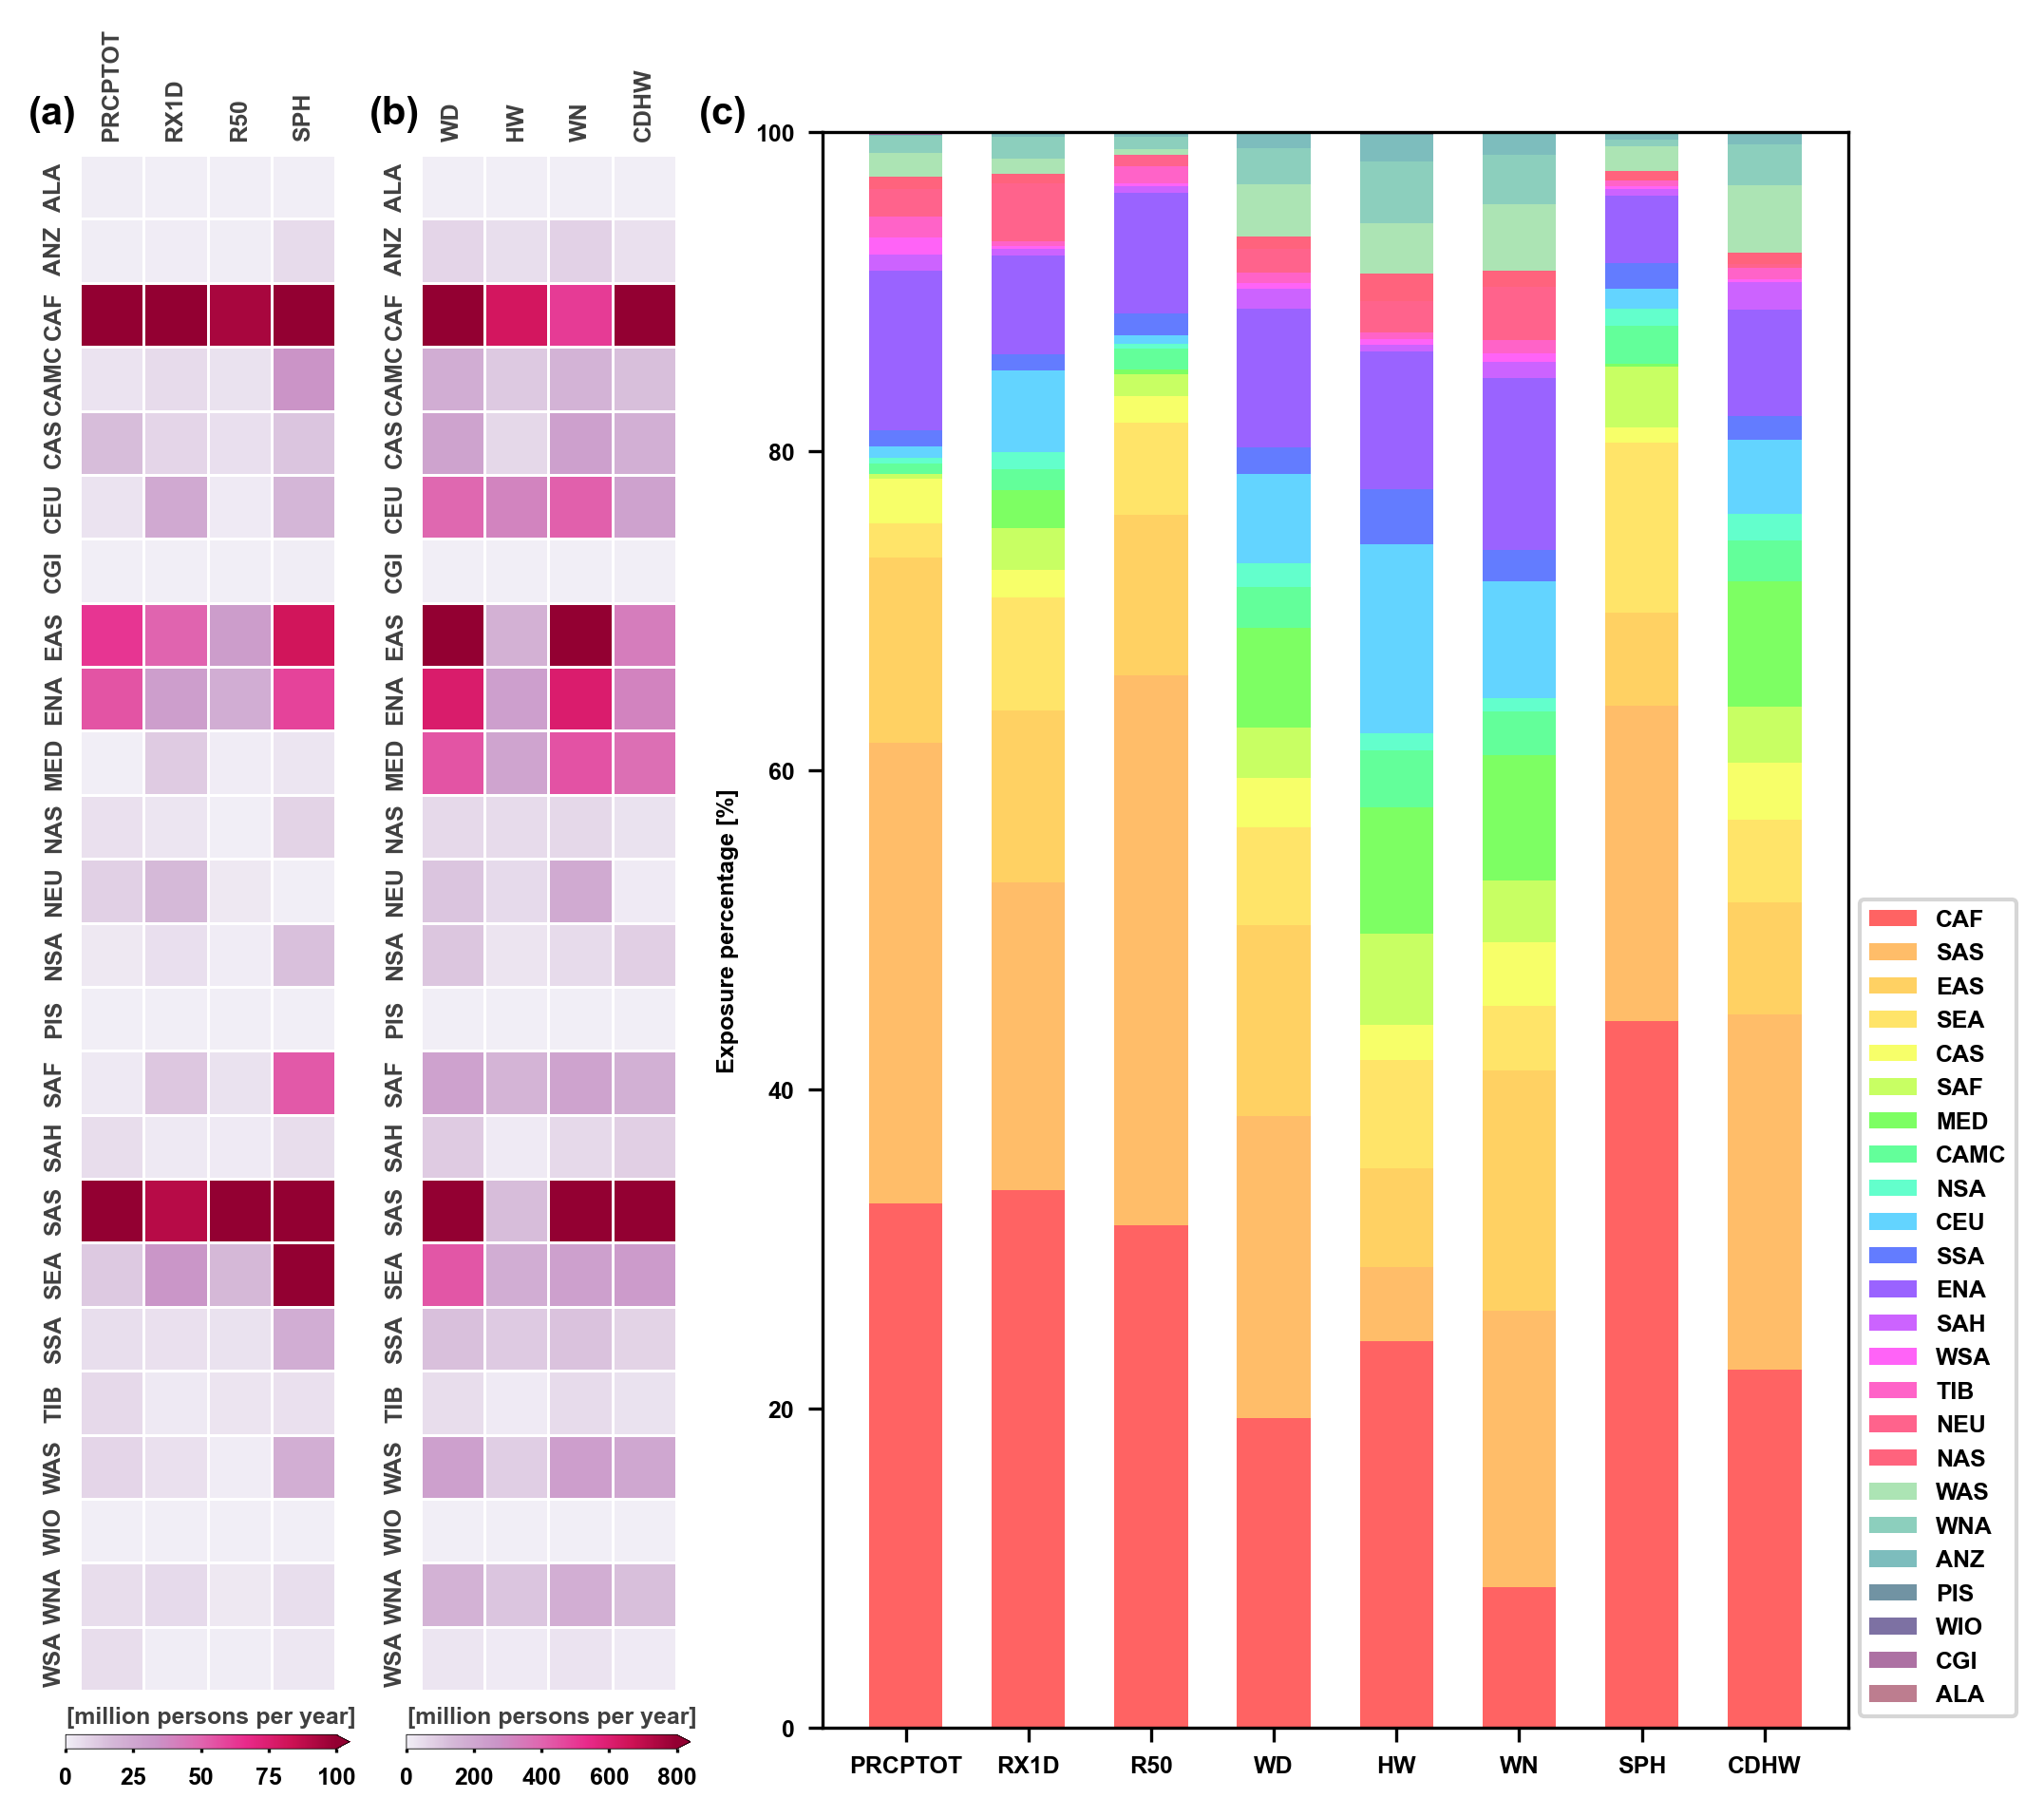

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from matplotlib.colors import ListedColormap,LinearSegmentedColormap

plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({"font.size":6})

clist = ["#F1EEF6", "#D5B9D8", "#CA95C8", "#E065AF", "#E92A8B", "#CE1255", "#930032"]
# clist = ["#009392","#72aaa1","#b1c7b3","#f1eac8","#e5b9ad","#d98994","#d0587e"]
newcmap = LinearSegmentedColormap.from_list('chaos',clist)

# clist = ["#66C5CC", "#F6CF71", "#F89C74", "#DCB0F2", "#87C55F", "#9EB9F3", "#FE88B1", "#C9DB74", "#8BE0A4", "#B497E7", "#D3B484", "#B3B3B3"]
# clist = ["#5F4690","#1D6996","#38A6A5","#0F8554","#73AF48","#EDAD08","#E17C05","#CC503E","#94346E","#6F4070","#994E95","#666666"]
# cmap2 = LinearSegmentedColormap.from_list('chaos',clist)
# colors = []
# levels_input = range(0, 24)
# cmap = plt.get_cmap(cmap2)
# norm = plt.Normalize(0, 400)
# n = len(levels_input)
# space = levels_input[1] - levels_input[0]
# for l in levels_input:
#     c = ((l+(space/2))/(levels_input[-1]+space)) * 400
#     colors.append(cmap(norm(c)))

#Dark24
colors = ["#2E91E5", "#E15F99", "#1CA71C", "#FB0D0D", "#DA16FF", "#222A2A", "#B68100", "#750D86", "#EB663B", "#511CFB", "#00A08B", "#FB00D1",
         "#FC0080", "#B2828D", "#6C7C32", "#778AAE", "#862A16", "#A777F1", "#620042", "#1616A7", "#DA60CA", "#6C4516", "#0D2A63", "#AF0038"]

#light24
colors = ["#FD3216", "#00FE35", "#6A76FC", "#FED4C4", "#FE00CE", "#0DF9FF", "#F6F926", "#FF9616", "#479B55", "#EEA6FB", "#DC587D", "#D626FF",
         "#6E899C", "#00B5F7", "#B68E00", "#C9FBE5", "#FF0092", "#22FFA7", "#E3EE9E", "#86CE00", "#BC7196", "#7E7DCD", "#FC6955", "#E48F72",]
# muted color
colors = ['#FF6363', '#FFBD69', '#FFD163', '#FFE469', '#F7FF69', '#C8FF63', '#7DFF63', '#63FF9A', '#63FFCC', '#63D4FF', '#637CFF',
                '#9A63FF', '#CC63FF', '#FF63F7', '#FF63C8', '#FF638C', '#FF637D', '#ACE4B4', '#8CCFBD', '#7DBDBD', '#7193A3', '#7D71A3', '#AD71A3', '#BD7D8F']
# figure
fig = plt.figure(figsize=(9,8), dpi=300)
# plot heatmap

ax1 = fig.add_subplot(1, 6, 1)
h = sb.heatmap(data_fig1.iloc[:, 1:].T,  cmap=newcmap, vmin=0, vmax=100, square=True,
           linewidth=0.3, cbar=False, cbar_kws={"shrink": .5, "orientation": "horizontal", "fraction": 0.1, "aspect": 20, "pad":0.02, "extend": "max", "ticks": [0, 50, 100, 150, 200]})
# xticks
ax1.xaxis.tick_top()
xticks_labels = ['PRCPTOT', 'RX1D', 'R50', 'SPH']
ax1.set_xticks(np.arange(4) + .5, xticks_labels, rotation=90)
# axis labels
plt.xlabel('')
plt.ylabel('')

ax1.tick_params("x",which="major",
               length=0, width = 0,
               colors = "0.25")
ax1.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax1.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
cbar = h.figure.colorbar(h.collections[0],shrink=1, orientation="horizontal", fraction=0.1, aspect=20, pad=.025, extend="max", ticks=[0, 25, 50, 75, 100])
cbar.ax.tick_params(size=1)
cbar.outline.set_linewidth(0.2)
ax1.text(-0.2, 1.02, "(a)", fontsize=10, transform=ax1.transAxes)

ax2 = fig.add_subplot(1, 6, 2)
h = sb.heatmap(data_fig2.iloc[:, 1:].T,  cmap=newcmap, vmin= 0, vmax=800, square=True,
           linewidth=0.3, cbar=False, cbar_kws={"shrink": .5, "orientation": "horizontal", "fraction": 0.1, "aspect": 20, "pad":0.02, "extend": "max", "ticks": [0, 200, 400, 600, 800]})
# xticks
ax2.xaxis.tick_top()
xticks_labels = ['WD', 'HW', 'WN', 'CDHW']
ax2.set_xticks(np.arange(4) + .5, xticks_labels, rotation=90)
# axis labels
plt.xlabel('')
plt.ylabel('')

ax2.tick_params("x",which="major",
               length=0, width = 0,
               colors = "0.25")
ax2.tick_params("y",which="major",
               length=0 ,width = 0,
               colors = "0.25")
ax2.tick_params(which = "minor",
               length = 0, width = 0,
               labelsize=10,labelcolor = "0.25")
cbar = h.figure.colorbar(h.collections[0],shrink=1, orientation="horizontal", fraction=0.1, aspect=20, pad=.025, extend="max", ticks=[0, 200, 400, 600, 800])
cbar.ax.tick_params(size=1)
cbar.outline.set_linewidth(0.2)
ax2.text(-0.2, 1.02, "(b)", fontsize=10, transform=ax2.transAxes)
ax2.text(-0.05, -0.021, "[million persons per year]", transform=ax2.transAxes, color="0.25")
ax1.text(-0.05, -0.021, "[million persons per year]", transform=ax1.transAxes, color="0.25")


ax3= plt.axes([0.42, 0.19, 0.4, 0.7])
# Data
r = range(1, 9)

df = data.loc[[8, 10, 9, 4, 1, 6, 3, 0]]
df = df.iloc[:, 1:]
# From raw value to percentage
totals = [a+b+c+d+e+f+g+h+i+j+k+l+m+n+o+p+q+r+s+t+u+v+w+x for a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x in zip(df['ALA'], 
df['ANZ'], df['CAF'], df['CAMC'], df['CAS'], df['CEU'], df['CGI'], df['EAS'], df['ENA'], df['MED'], df['NAS'], df['NEU'], df['NSA'],
df['PIS'], df['SAF'], df['SAH'], df['SAS'], df['SEA'], df['SSA'], df['TIB'], df['WAS'], df['WIO'], df["WNA"], df['WSA']
)]
ALA = [i / j * 100 for i,j in zip(df['ALA'], totals)]
ANZ = [i / j * 100 for i,j in zip(df['ANZ'], totals)]
CAF = [i / j * 100 for i,j in zip(df['CAF'], totals)]
CAMC = [i / j * 100 for i,j in zip(df['CAMC'], totals)]
CAS = [i / j * 100 for i,j in zip(df['CAS'], totals)]
CEU = [i / j * 100 for i,j in zip(df['CEU'], totals)]
CGI = [i / j * 100 for i,j in zip(df['CGI'], totals)]
EAS = [i / j * 100 for i,j in zip(df['EAS'], totals)]
ENA = [i / j * 100 for i,j in zip(df['ENA'], totals)]
MED = [i / j * 100 for i,j in zip(df['MED'], totals)]
NAS = [i / j * 100 for i,j in zip(df['NAS'], totals)]
NEU = [i / j * 100 for i,j in zip(df['NEU'], totals)]
NSA = [i / j * 100 for i,j in zip(df['NSA'], totals)]
PIS = [i / j * 100 for i,j in zip(df['PIS'], totals)]
SAF = [i / j * 100 for i,j in zip(df['SAF'], totals)]
SAH = [i / j * 100 for i,j in zip(df['SAH'], totals)]
SAS = [i / j * 100 for i,j in zip(df['SAS'], totals)]
SEA = [i / j * 100 for i,j in zip(df['SEA'], totals)]
SSA = [i / j * 100 for i,j in zip(df['SSA'], totals)]
TIB = [i / j * 100 for i,j in zip(df['TIB'], totals)]
WAS = [i / j * 100 for i,j in zip(df['WAS'], totals)]
WIO = [i / j * 100 for i,j in zip(df['WIO'], totals)]
WNA = [i / j * 100 for i,j in zip(df['WNA'], totals)]
WSA = [i / j * 100 for i,j in zip(df['WSA'], totals)]
print(np.array(SAS) + np.array(CAF) + np.array(EAS) + np.array(SEA))

# plot
barWidth = 0.6
names = ('A','B','C','D','E')
# Create PFHxA Bars

ax3.bar(r, CAF, color=colors[0], edgecolor=None, width=barWidth, 
label="CAF")
# Create PFHpA Bars
ax3.bar(r, SAS, bottom=CAF, color=colors[1], edgecolor=None, 
width=barWidth, label="SAS")
# Create PFOA Bars
ax3.bar(r, EAS, bottom=[i+j for i,j in zip(CAF, SAS)], color=colors[2], 
edgecolor=None, width=barWidth, label="EAS")
# Create PFNA Bars
ax3.bar(r, SEA, bottom=[i+j+k for i,j,k in zip(CAF, SAS, EAS)], 
color=colors[3], edgecolor=None, width=barWidth, label="SEA")
# Create PFDA Bars
ax3.bar(r, CAS, bottom=[i+j+k+l for i,j,k,l in zip(CAF, SAS, EAS, 
SEA)], color=colors[4], edgecolor=None, width=barWidth, label="CAS")
# Create PFUnDA Bars
ax3.bar(r, SAF, bottom=[i+j+k+l+m for i,j,k,l,m in zip(CAF, SAS, 
EAS, SEA, CAS)], color=colors[5], edgecolor=None, width=barWidth, 
label="SAF")
# Create PFHxS Bars
ax3.bar(r, MED, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(CAF, SAS, 
EAS, SEA, CAS, SAF)], color=colors[6], edgecolor=None, 
width=barWidth, label="MED")
# Create PFOS Bars
ax3.bar(r, CAMC, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(CAF, SAS, 
EAS, SEA, CAS,SAF, MED)], color=colors[7], 
edgecolor=None, width=barWidth, label="CAMC")

ax3.bar(r, NSA, bottom=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o, p in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC)], color=colors[8], 
edgecolor=None, width=barWidth, label="NSA")

ax3.bar(r, CEU, bottom=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA)], color=colors[9], 
edgecolor=None, width=barWidth, label="CEU")

ax3.bar(r, SSA, bottom=[i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU)], color=colors[10], 
edgecolor=None, width=barWidth, label="SSA")

ax3.bar(r, ENA, bottom=[i+j+k+l+m+n+o+p+q+r+s for i,j,k,l,m,n,o,p,q,r,s in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU, SSA)], color=colors[11], 
edgecolor=None, width=barWidth, label="ENA")

ax3.bar(r, SAH, bottom=[i+j+k+l+m+n+o+p+q+r+s+t for i,j,k,l,m,n,o,p,q,r,s,t in zip(CAF, SAS, 
EAS, SEA, CAS, SAF,  MED, CAMC, NSA, CEU, SSA, ENA)], color=colors[12], 
edgecolor=None, width=barWidth, label="SAH")

ax3.bar(r, WSA, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u for i,j,k,l,m,n,o,p,q,r,s,t,u in zip(CAF, SAS, 
EAS, SEA, CAS, SAF,  MED, CAMC, NSA, CEU, SSA, ENA, SAH)], color=colors[13], 
edgecolor=None, width=barWidth, label="WSA")

ax3.bar(r, TIB, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v for i,j,k,l,m,n,o,p,q,r,s,t,u,v in zip(CAF, SAS, 
EAS, SEA, CAS, SAF,  MED, CAMC, NSA, CEU, SSA, ENA, SAH, WSA)], color=colors[14], 
edgecolor=None, width=barWidth, label="TIB")

ax3.bar(r, NEU, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v+w for i,j,k,l,m,n,o,p,q,r,s,t,u,v,w in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU, SSA, ENA, SAH, WSA, TIB)], color=colors[15], 
edgecolor=None, width=barWidth, label="NEU")

ax3.bar(r, NAS, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v+w+x for i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU, SSA, ENA, SAH, WSA, TIB, NEU)], color=colors[16], 
edgecolor=None, width=barWidth, label="NAS")

ax3.bar(r, WAS, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v+w+x+y for i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU, SSA, ENA, SAH, WSA, TIB, NEU, NAS)], color=colors[17], 
edgecolor=None, width=barWidth, label="WAS")

ax3.bar(r, WNA, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v+w+x+y+z for i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU, SSA, ENA, SAH, WSA, TIB, NEU, NAS, WAS)], color=colors[18], 
edgecolor=None, width=barWidth, label="WNA")

ax3.bar(r, ANZ, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v+w+x+y+z+a for i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,a in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU, SSA, ENA, SAH, WSA, TIB, NEU, NAS, WAS, WNA)], color=colors[19], 
edgecolor=None, width=barWidth, label="ANZ")

ax3.bar(r, PIS, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v+w+x+y+z+a+b for i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,a,b in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU, SSA, ENA, SAH, WSA, TIB, NEU, NAS, WAS, WNA, ANZ)], color=colors[20], 
edgecolor=None, width=barWidth, label="PIS")

ax3.bar(r, WIO, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v+w+x+y+z+a+b+c for i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,a,b,c in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU, SSA, ENA, SAH, WSA, TIB, NEU, NAS, WAS, WNA, ANZ, PIS)], color=colors[21], 
edgecolor=None, width=barWidth, label="WIO")

ax3.bar(r, CGI, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v+w+x+y+z+a+b+c+d for i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,a,b,c,d in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU, SSA, ENA, SAH, WSA, TIB, NEU, NAS, WAS, WNA, ANZ, PIS, WIO)], color=colors[22], 
edgecolor=None, width=barWidth, label="CGI")

ax3.bar(r, ALA, bottom=[i+j+k+l+m+n+o+p+q+r+s+t+u+v+w+x+y+z+a+b+c+d+e for i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,a,b,c,d,e in zip(CAF, SAS, 
EAS, SEA, CAS, SAF, MED, CAMC, NSA, CEU, SSA, ENA, SAH, WSA, TIB, NEU, NAS, WAS, WNA, ANZ, PIS, WIO, CGI)], color=colors[23], 
edgecolor=None, width=barWidth, label="ALA")
ax3.set_ylim(0, 100)

ax3.text(-0.12, 1.005, "(c)", fontsize=10, transform=ax3.transAxes)

# Custom x axis
plt.xticks(r, ["PRCPTOT", "RX1D", "R50", "WD", "HW", "WN", "SPH", "CDHW"])
# plt.xlabel("Sample ID")

# Custom y axis
plt.ylabel("Exposure percentage [%]")

# Add a legend
plt.legend(loc='lower left', bbox_to_anchor=(1,0), ncol=1)

# Show graphic
#ax3 stack chart


# plt.tight_layout()
# title
# title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
# plt.title(title, loc='left')
plt.savefig(output_folder + f"regional_population_exposure_ssp370_revised.jpg", dpi=300, bbox_inches='tight')
plt.show()